In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [6]:
df=pd.read_csv('detection_results_vision_openai.csv')

In [7]:
df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time,response_time_vision,detections_vision_openai
0,1504047,-0.12759,51.52702,13,33,19,DX64WCVN23LSWFWPBOWT5YGBMO45N3SF3HBQLCFHXQUJCV...,https://imgcy.trivago.com/partner-images/1d/fd...,building,0.9999,Studios 2 Let Serviced Apartments,2024-03-07,1.998302,NaN,0.750398,0.124018,3.288819,None
1,10405908,-0.12750,51.50722,4,14,14,RB77EISJ5MQDUEGFZSGFH3EGQQNEDPHANSIYFNAFJJKIN6...,https://imgcy.trivago.com/partner-images/88/7f...,building,1.0000,Lovely Family Apartments For Upto 6 Near Oxfor...,2024-03-07,0.820251,NaN,0.413374,0.468961,4.299603,None
2,18426,-0.18294,51.49556,21,77,17,SWPQ2FXDSA2PH4KDMR56KNBPFJZ5C77DBKGBBAA4BPG5CG...,https://imgcy.trivago.com/partner-images/95/9f...,building,1.0000,Meliá London Kensington Meliá Collection,2024-03-07,4.866410,NaN,0.632710,0.451684,5.174545,None
3,22032936,-0.12750,51.50722,4,14,11,3DL2RXNO4NVWZFBC4L2YATHITDKB2DDWBF5LQ6JLO2C6GM...,https://imgcy.trivago.com/partner-images/d8/d7...,building,1.0000,Victorian Conversion Garden Flat,2024-03-07,0.820251,NaN,0.579433,0.213040,2.592985,The Shard
4,20648498,-0.12750,51.50722,4,14,9,4MLPB64JFHPSIM2YTAFY4U5HCCVUIUABRH7GUVMVTJZKKO...,https://imgcy.trivago.com/partner-images/e3/16...,building,1.0000,Stunning Central Richmond With Garden,2024-03-07,0.820251,NaN,0.650984,0.381180,4.568479,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036,4.262479,Palace Of Westminster
912,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676,3.912997,Big Ben
913,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796,4.163838,The landmark in the image is the Palace of Wes...
914,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791,6.533917,Big Ben


In [13]:
filtered_df = df[df['detections_vision_openai'].notna()] 
filtered_df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time,response_time_vision,detections_vision_openai
0,1504047,-0.12759,51.52702,13,33,19,DX64WCVN23LSWFWPBOWT5YGBMO45N3SF3HBQLCFHXQUJCV...,https://imgcy.trivago.com/partner-images/1d/fd...,building,0.9999,Studios 2 Let Serviced Apartments,2024-03-07,1.998302,NaN,0.750398,0.124018,3.288819,None
1,10405908,-0.12750,51.50722,4,14,14,RB77EISJ5MQDUEGFZSGFH3EGQQNEDPHANSIYFNAFJJKIN6...,https://imgcy.trivago.com/partner-images/88/7f...,building,1.0000,Lovely Family Apartments For Upto 6 Near Oxfor...,2024-03-07,0.820251,NaN,0.413374,0.468961,4.299603,None
2,18426,-0.18294,51.49556,21,77,17,SWPQ2FXDSA2PH4KDMR56KNBPFJZ5C77DBKGBBAA4BPG5CG...,https://imgcy.trivago.com/partner-images/95/9f...,building,1.0000,Meliá London Kensington Meliá Collection,2024-03-07,4.866410,NaN,0.632710,0.451684,5.174545,None
3,22032936,-0.12750,51.50722,4,14,11,3DL2RXNO4NVWZFBC4L2YATHITDKB2DDWBF5LQ6JLO2C6GM...,https://imgcy.trivago.com/partner-images/d8/d7...,building,1.0000,Victorian Conversion Garden Flat,2024-03-07,0.820251,NaN,0.579433,0.213040,2.592985,The Shard
4,20648498,-0.12750,51.50722,4,14,9,4MLPB64JFHPSIM2YTAFY4U5HCCVUIUABRH7GUVMVTJZKKO...,https://imgcy.trivago.com/partner-images/e3/16...,building,1.0000,Stunning Central Richmond With Garden,2024-03-07,0.820251,NaN,0.650984,0.381180,4.568479,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036,4.262479,Palace Of Westminster
912,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676,3.912997,Big Ben
913,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796,4.163838,The landmark in the image is the Palace of Wes...
914,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791,6.533917,Big Ben


In [14]:
unique_ids = filtered_df['accommodation_id'].unique()

In [15]:
unique_ids

array([ 1504047, 10405908,    18426, 22032936, 20648498, 32082660,
       15909640, 22905052, 24052168,  2744694, 36260808, 28600246,
       34410554,    12693,    48082, 11569320, 31055564, 29449878,
       27984054, 22140308,  8567846, 24561544, 17603990,   893427,
       36419574,    47164, 26344724, 30080756,   129815, 30977218,
       33619904,    12653, 33086724,    12644, 30754398, 34314032,
       28615264,   152921,    47787,  9462704, 30628994, 19859538,
       10823816, 20682736, 28503346, 22108358, 19068030, 30226106,
       29495398, 31593862, 35841984, 18009662,    16160, 13293688,
        8839568,    48064, 19339092,  2416802, 31018584, 34698378,
       15263432, 10119648, 31963088,   891103,  3799660, 32128086,
       21706300, 23327176, 21607950,   787296, 34966990, 35520374,
        8849250, 23383178, 30271424,    48150,  2144308,    47120,
       33206400, 16557610, 23088394, 31540182,    47705,   132543,
       33160948, 24961938, 30293806, 36013736, 30598260, 33198

In [18]:
unique_id_count = filtered_df['accommodation_id'].nunique()

In [19]:
print(unique_id_count)

587


In [21]:
df_1=pd.read_csv('accomodation_star_rating.csv')

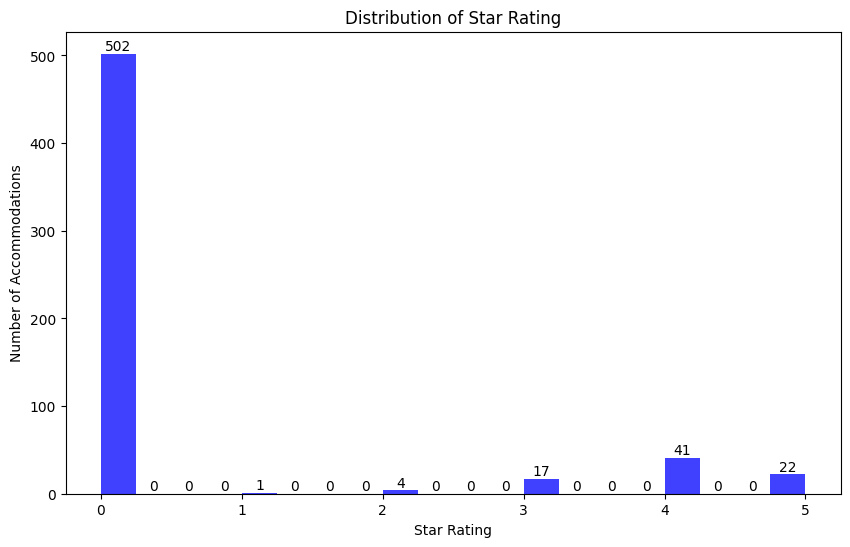

In [24]:
counts, bin_edges = np.histogram(df_1['star_rating'], bins=20)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), alpha=0.75, color='blue')

# Add text labels above the bars
for x, y in zip(bin_centers, counts):
    plt.text(x, y, str(y), ha='center', va='bottom')  # ha and va denote horizontal and vertical alignment

# Set title and labels
plt.title('Distribution of Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Accommodations')
plt.show()